### Packages

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Files

In [108]:
normalized_1_7_8 = pd.read_csv("normalized_prompt_1_7_8.csv")
normalized_2 = pd.read_csv("prompt2.csv", index_col="essay_id")
normalized_1_7_8.head()

,Essay_id,Essay_set_id,Essay,rater1_domain1,rater2_domain1,domain1_score,normalized_score
0,1,1,dear local newspap think effect comput peopl g...,4.0,4.0,8.0,0.6
1,2,1,dear believ use comput benefit us mani way lik...,5.0,4.0,9.0,0.7
2,3,1,dear peopl use comput everyon agre benefit soc...,4.0,3.0,7.0,0.5
3,4,1,dear local newspap found mani expert say compu...,5.0,5.0,10.0,0.8
4,5,1,dear know comput posit effect people. comput c...,4.0,4.0,8.0,0.6


In [109]:
normalized_2.head()

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,normalized_score
essay_id,,,,,,,,,
2978,2,Certain materials being removed from libraries...,4,4,4,4,4,4,0.750
2979,2,Write a persuasive essay to a newspaper reflec...,1,2,1,1,2,1,0.000
2980,2,Do you think that libraries should remove cert...,2,3,2,3,3,3,0.375
2981,2,"In @DATE1's world, there are many things found...",4,4,4,4,4,4,0.750
2982,2,In life you have the 'offensive things'. The l...,4,4,4,4,4,4,0.750


### Insert Prompt 2 Scores into Prompt 1 7 8 Scores File

In [117]:
normalized_score = normalized_1_7_8["normalized_score"].values
for idx in normalized_1_7_8[normalized_1_7_8["Essay_id"].isin(normalized_2.index)].index:
    normalized_score[idx] = normalized_2.loc[idx + 1195, "normalized_score"]
normalized_1_7_8["normalized_score"] = normalized_score

### Visualizing Normalized Scores

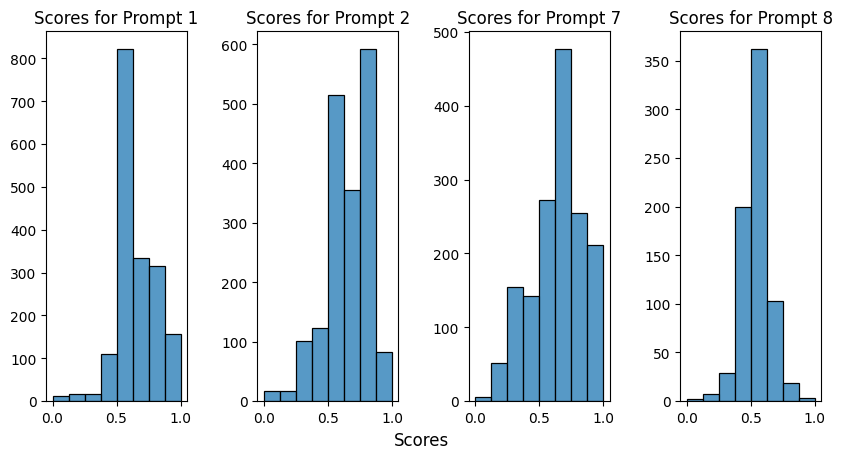

In [123]:
fig, ax = plt.subplots(1, 4, sharex=True)
sns.histplot(normalized_1_7_8[normalized_1_7_8["Essay_set_id"] == 1]["normalized_score"], bins=8, ax=ax[0])
sns.histplot(normalized_1_7_8[normalized_1_7_8["Essay_set_id"] == 2]["normalized_score"], bins=8, ax=ax[1])
sns.histplot(normalized_1_7_8[normalized_1_7_8["Essay_set_id"] == 7]["normalized_score"], bins=8, ax=ax[2])
sns.histplot(normalized_1_7_8[normalized_1_7_8["Essay_set_id"] == 8]["normalized_score"], bins=8, ax=ax[3])

ax[0].set_title("Scores for Prompt 1")
ax[1].set_title("Scores for Prompt 2")
ax[2].set_title("Scores for Prompt 7")
ax[3].set_title("Scores for Prompt 8")

ax[0].set(xlabel=None, ylabel=None)
ax[1].set(xlabel=None, ylabel=None)
ax[2].set(xlabel=None, ylabel=None)
ax[3].set(xlabel=None, ylabel=None) 

fig.supxlabel("Scores")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_figwidth(10)
plt.show()

### Exporting File

In [121]:
normalized_1_7_8.to_csv("normalized_kaggle_essay_set.csv", index=False)